In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [34]:
dt_train = pd.read_csv('/Users/keith/Downloads/Google_Stock_Price_Train.csv')

In [35]:
dt_train

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [36]:
dt_test

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


In [37]:
# two-dimensional numpy array
open_train = dt_train.iloc[:,1:2].values  #open is the open price column in dataset

In [38]:
open_train

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
open_train = scaler .fit_transform(open_train)

In [40]:
# Getting the inputs and the outputs, y_train is output, x_train is the input
X_train = open_train[0:1257]
y_train = open_train[1:1258]

In [41]:
# Reshaping inputs, input has a certain format (2D array, features)
# Changing the format of X_train into a 3D array, with a timestep
X_train = np.reshape(X_train, (1257, 1, 1))

In [42]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [43]:
LSTM_reg = Sequential()
# Adding the input layer and the LSTM layer
LSTM_reg.add(LSTM(units = 32, return_sequences = True, input_shape = (X_train.shape[1], 1)))
LSTM_reg.add(Dropout(0.2))

LSTM_reg.add(LSTM(units = 32, return_sequences = True))
LSTM_reg.add(Dropout(0.2))

LSTM_reg.add(LSTM(units = 32, return_sequences = True))
LSTM_reg.add(Dropout(0.2))

LSTM_reg.add(LSTM(units = 32, return_sequences = True))
LSTM_reg.add(Dropout(0.2))

LSTM_reg.add(LSTM(units = 32))
LSTM_reg.add(Dropout(0.2))

# Adding the output layer
LSTM_reg.add(Dense(units = 1))
# Compiling the RNN
LSTM_reg.compile(optimizer = 'adam', loss = 'mean_squared_error')
# Fitting the RNN to the Trainign set
LSTM_reg.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
40/40 [==============================] - 10s 5ms/step - loss: 0.2638
Epoch 2/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0997
Epoch 3/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0435
Epoch 4/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0217
Epoch 5/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0151
Epoch 6/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0139
Epoch 7/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0114
Epoch 8/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0094
Epoch 9/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0089
Epoch 10/100
40/40 [==============================] - ETA: 0s - loss: 0.006 - 0s 4ms/step - loss: 0.0060
Epoch 11/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0060
Epoch 12/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0055
Epoch 13/100

## Part 3 Predictions and visulization

In [44]:
# Get the real stock price from 2017 dataset
dt_test = pd.read_csv('/Users/keith/Downloads/Google_Stock_Price_Test.csv')
real_price_value = dt_test.iloc[:,1:2].values

In [45]:
# predict stock price for 2017
value_in = real_price_value
value_in = scaler.transform(value_in)
value_in = np.reshape(value_in, (20, 1, 1))
predicted_price_value = LSTM_reg.predict(value_in)
predicted_price_value = scaler.inverse_transform(predicted_price_value)

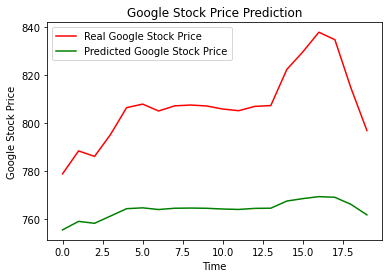

In [46]:
plt.plot(real_price_value, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_price_value, color = 'green', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show() #used 2017 testing data

In [47]:
# Root Mean Square Error (RMSE)
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_price_value, predicted_price_value))
print(rmse)

45.03135527028927


In [48]:
real_all_price = pd.read_csv('/Users/keith/Downloads/Google_Stock_Price_Train.csv')
real_all_price = real_all_price.iloc[:,1:2].values

In [49]:
predicted_all_price = LSTM_reg.predict(X_train)
predicted_all_price = scaler.inverse_transform(predicted_all_price)

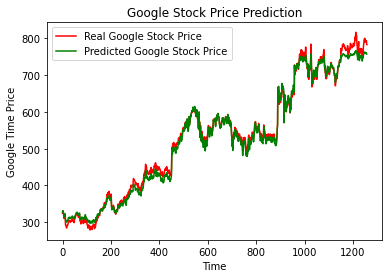

In [50]:
plt.plot(real_all_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_all_price, color = 'green', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Time Price')
plt.legend()
plt.show() # used 2012-2016 dataset, put the model back into training 
